# Problem 1
## (a)

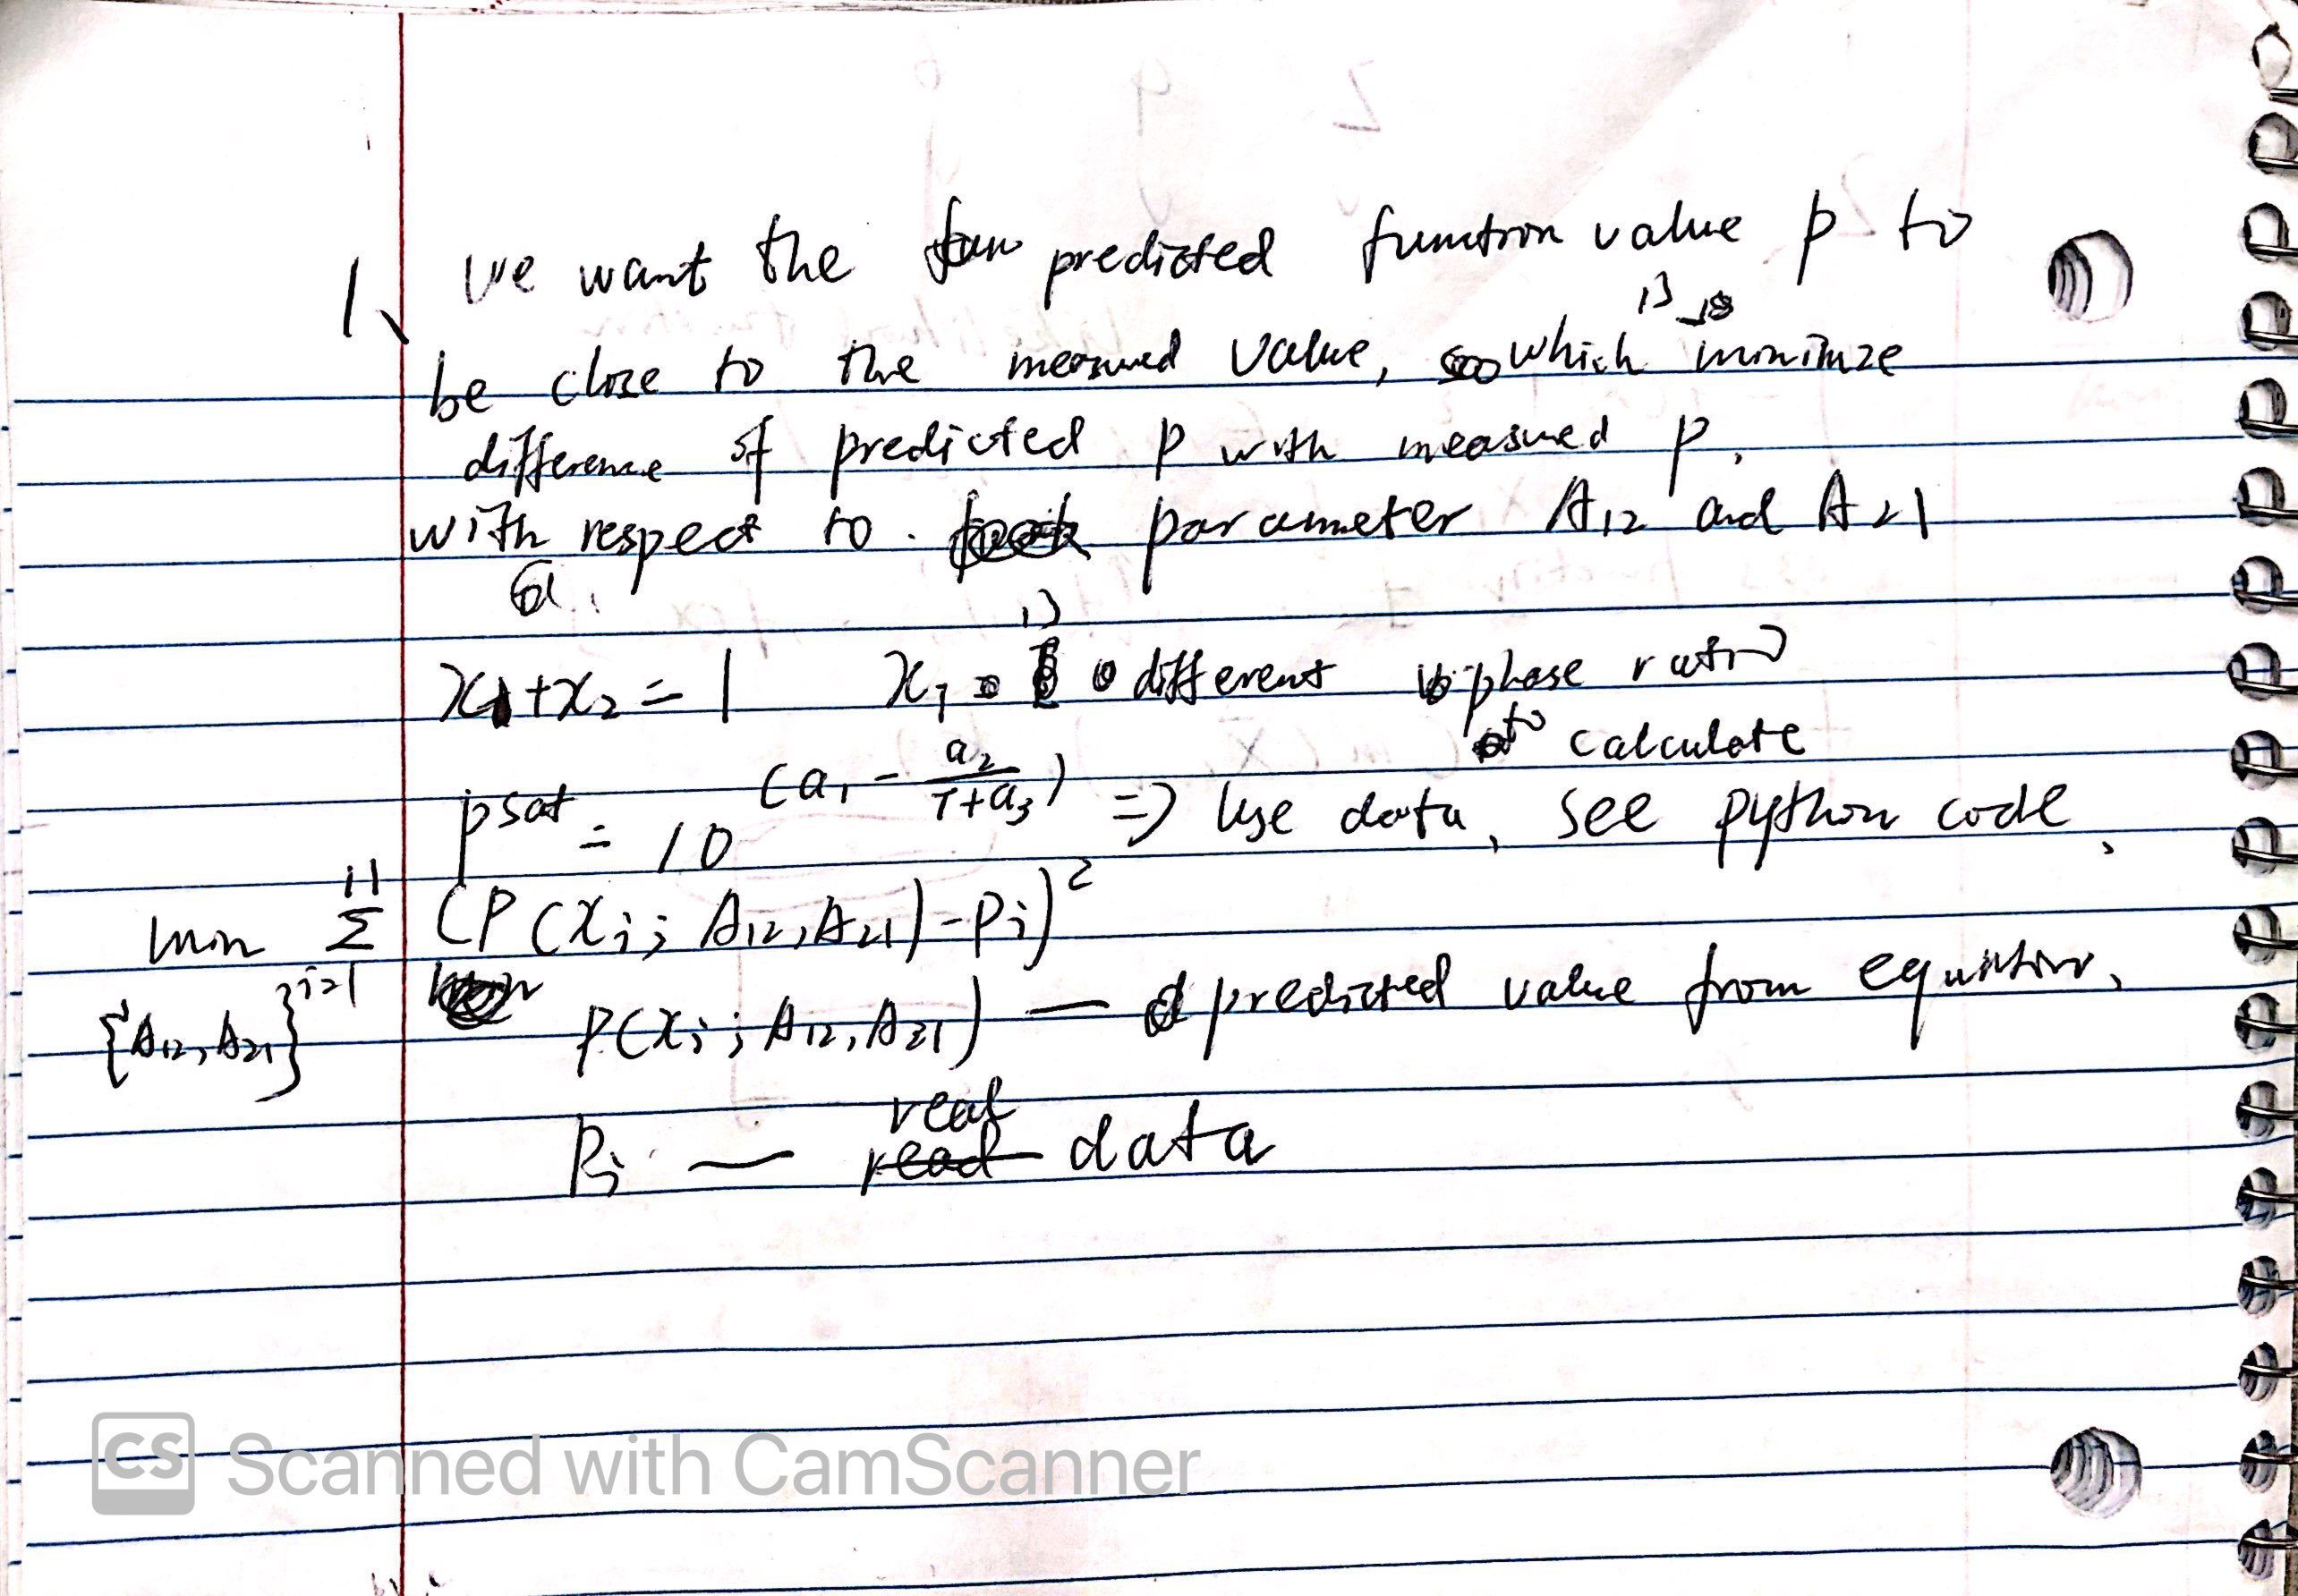

## (b)

In [30]:
import torch as t
from torch.autograd import Variable
import numpy as np

## x1+x2=1, p: measured pressure from experiments
x1 = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
x2=np.array([1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0])
p = np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])
#define the two parameter the pressure parameter
T= 20; a1=8.07131  ; a11=7.43155;
a2=1730.63 ;  a12=1554.679;
a3=233.426;   a13=240.337;
p_sat_w=10**(a1-a2/(T+a3))
p_sat_d=10**(a11-a12/(T+a13))
# Define variables
x = Variable(t.tensor([1.0,1.0]),requires_grad=True)

#Step size
step = 0.001



# start gradient descent

for i in range(500):
    #Define loss: as shown in (1),loss function is the square difference of the p measured and modeled
    loss=0
    for i in range(11):
    #for i in range(0,len(x1)):
        #A12=x[0]
        p_model=x1[i]*t.exp(x[0]*(x[1]*x2[i]/(x[0]*x1[i]+x[1]*x2[i]))**2)*p_sat_w+x2[i]*t.exp(x[1]*(x[0]*x1[i]/(x[0]*x1[i]+x[1]*x2[i]))**2)*p_sat_d
        
        loss = loss+(p_model-p[i])**2
        
    loss.backward()
    x.grad.numpy()

    with t.no_grad():
        x-= step*x.grad
        x.grad.zero_()
        
print("The A12 and A21 is",x.data.numpy(),"respectively.")
print("The value of the final loss function is",loss.data.numpy())

The A12 and A21 is [1.9584197 1.6891853] respectively.
The value of the final loss function is 0.6701896


## (c)

In [31]:
import math 

for i in range(0,len(p)):
    p_model=x1[i]*math.exp(x[0]*(x[1]*x2[i]/(x[0]*x1[i]+x[1]*x2[i]))**2)*p_sat_w + x2[i]*math.exp(x[1]*(x[0]*x1[i]/(x[0]*x1[i]+x[1]*x2[i]))**2)*p_sat_d
    #pest =  ((x1[i]*p_sat_w*math.exp(x[0]*((x[1]*x2[i])/(x[0]*x1[i]+x[1]*x2[i]))**2))+ x2[i]*m.exp( x[1]*((x[0]*x1[i])/(x[0]*x1[i]+x[1]*x2[i]))**2))*p_sat_d
 
    print("For x1=",i,". Difference between the measured pressure and estimated pressure is ", p_model-p[i])

For x1= 0 . Difference between the measured pressure and estimated pressure is  0.7240995274052437
For x1= 1 . Difference between the measured pressure and estimated pressure is  0.24432090536483742
For x1= 2 . Difference between the measured pressure and estimated pressure is  -0.24702720386279964
For x1= 3 . Difference between the measured pressure and estimated pressure is  -0.03268286709894852
For x1= 4 . Difference between the measured pressure and estimated pressure is  0.0740101742529049
For x1= 5 . Difference between the measured pressure and estimated pressure is  0.04983779062995097
For x1= 6 . Difference between the measured pressure and estimated pressure is  -0.10954763818186564
For x1= 7 . Difference between the measured pressure and estimated pressure is  -0.015176004656133557
For x1= 8 . Difference between the measured pressure and estimated pressure is  0.04777803380525114
For x1= 9 . Difference between the measured pressure and estimated pressure is  0.029993125989761

## notes and discussion on Problem 1(C)

There are diffence between the measured value and predicted value, however based on the difference shown above, the model after optimize the parameter is accuratey enough to predict the pressure. 

# Problem 2

In [24]:
from bayes_opt import BayesianOptimization

def function(x1,x2):
    return -((4-2.1*x1**2+(x1**4)/3)*x1**2+x1*x2+(-4+4*x2**2)*x2**2)

    
pbound = {'x1':(-3,3),'x2':(-2,2)}

optimizer = BayesianOptimization(f=function,pbounds=pbound,random_state=1)
optimizer.maximize(init_points=100,n_iter=10)## the number of the exploration, the number of exploitation 
print(optimizer.max)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -26.91    | -2.119    | -1.631    |
|  4        | -2.856    | -1.882    | -0.6178   |
|  5        | -1.054    | -0.6194   |  0.1553   |
|  6        |  0.5211   | -0.4848   |  0.7409   |
|  7        | -11.28    | -1.773    |  1.512    |
|  8        | -66.76    | -2.836    |  0.6819   |
|  9        | -0.5377   | -0.4962   |  0.2348   |
|  10       | -12.02    | -2.158    | -1.208    |
|  11       | -40.85    |  1.804    |  1.873    |
|  12       | -0.5433   | -1.119    |  0.7693   |
|  13       | -28.42    |  2.258    |  1.578    |
|  14       | -60.72    | -2.49     | -1.844    |
|  15       | -12.29    | -1.981    |  1.513    |
|  16       | -18.1     | -2.41     | -0.3156   |
|  17       | -54.18    |  2.747    |  0.1327   |
|  18       | -0.547    |  1.151    | -0.7379   |


|  101      | -2.041    | -1.067    | -0.6066   |
|  102      |  0.4742   | -0.1671   | -0.4568   |
|  103      | -150.9    |  3.0      | -2.0      |
|  104      |  0.6154   | -0.02705  | -0.8938   |
|  105      | -0.08602  |  0.1547   | -0.03081  |
|  106      | -5.802    | -2.207    |  0.6422   |
|  107      | -2.271    |  1.545    |  0.1969   |
|  108      |  0.7536   |  0.1297   |  0.5818   |
|  109      | -0.9096   | -0.6191   | -0.4281   |
|  110      | -0.1029   | -0.1362   |  1.02     |
{'target': 0.7535885825747908, 'params': {'x1': 0.12968442858523277, 'x2': 0.5818430351610795}}


In [25]:
x=[0.12968442858523277,0.5818430351610795]
def function(x1,x2):
    return -((4-2.1*x1**2+(x1**4)/3)*x1**2+x1*x2+(-4+4*x2**2)*x2**2)
function(x[0],x[1])

0.7535885825747908